In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load CSV file into a pandas DataFrame
# Replace 'file_path.csv' with the actual file path or URL of your CSV file
file_path = '/Users/juanflores/Downloads/Datasets/student_habits_performance.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it loaded correctly
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Data Preparation and Cleaning

## Inspect the Dataset

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [4]:
df = df.dropna()

## Convert Categorical Variables

In [5]:
# Binary categories
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df['extracurricular_participation'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Ordinal mapping
diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
internet_map = {'Poor': 0, 'Average': 1, 'Good': 2}
education_map = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}

df['diet_quality'] = df['diet_quality'].map(diet_map)
df['internet_quality'] = df['internet_quality'].map(internet_map)
df['parental_education_level'] = df['parental_education_level'].map(education_map)

## Drop Irrelevant Columns

In [6]:
df.drop(columns=['student_id'], inplace=True)

## Check for Duplicates

In [7]:
# Duplicates
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)

In [8]:
df.describe()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,909.000000,873.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,0.495991,3.538724,2.504620,1.830363,0.215622,83.880308,6.474037,1.199120,3.051705,0.752475,1.289329,5.466447,0.317932,69.558196
std,2.302721,0.500271,1.469730,1.164802,1.071251,0.411479,9.453622,1.218943,0.724766,2.035632,0.744515,0.727759,2.857525,0.465929,16.929436
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,18.000000,0.000000,2.500000,1.700000,1.000000,0.000000,77.500000,5.600000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,58.400000
50%,20.000000,0.000000,3.500000,2.500000,1.800000,0.000000,84.200000,6.500000,1.000000,3.000000,1.000000,1.000000,5.000000,0.000000,70.400000
75%,22.000000,1.000000,4.500000,3.300000,2.600000,0.000000,90.700000,7.300000,2.000000,5.000000,1.000000,2.000000,8.000000,1.000000,81.300000
max,24.000000,1.000000,8.300000,7.200000,5.400000,1.000000,100.000000,10.000000,2.000000,6.000000,2.000000,2.000000,10.000000,1.000000,100.000000


## Univariate Analysis

### Numerical Features:

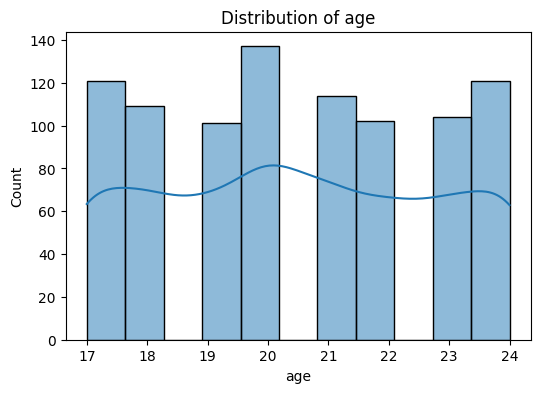

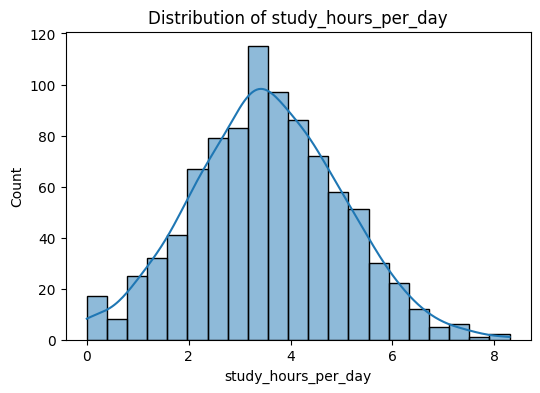

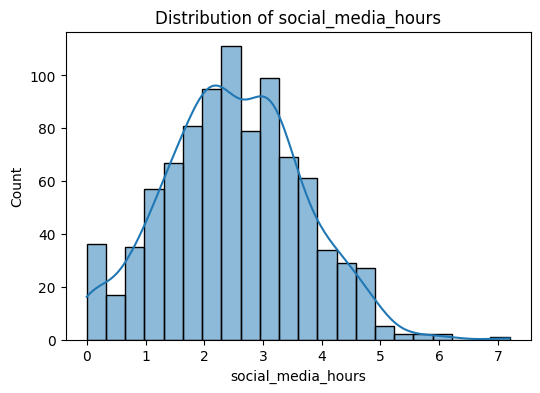

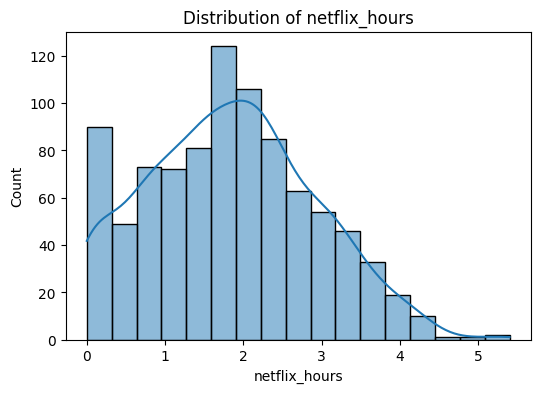

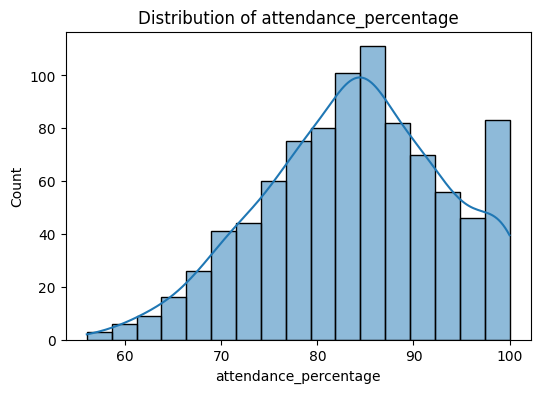

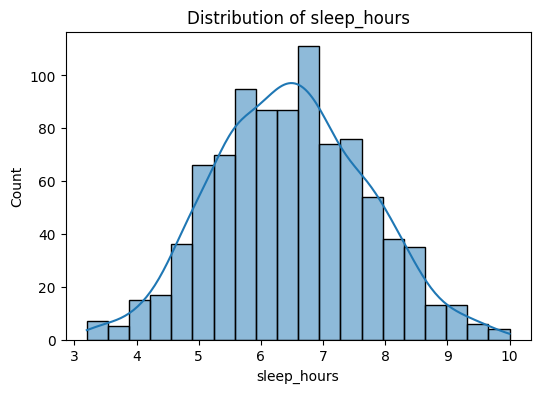

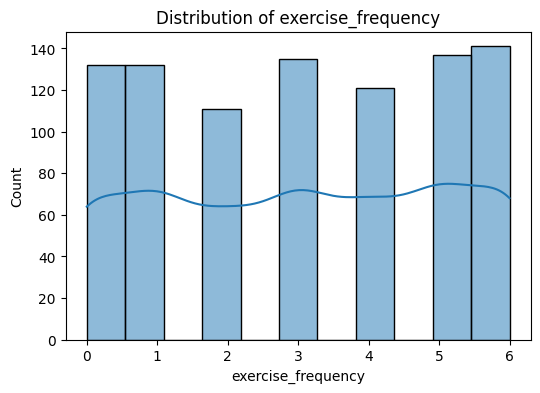

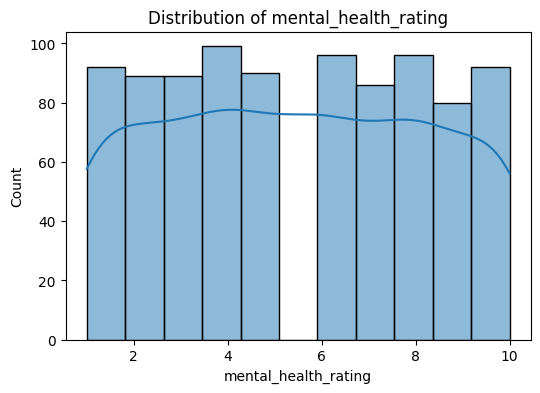

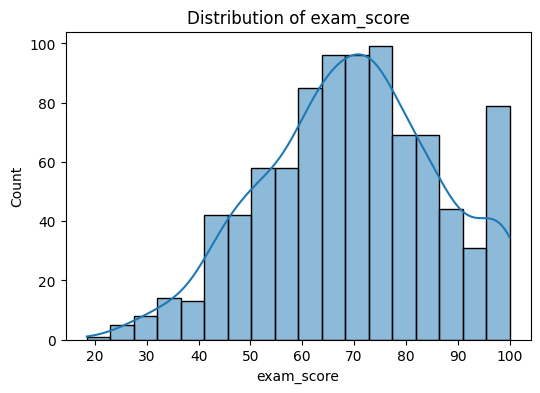

In [9]:
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Categorical Features:

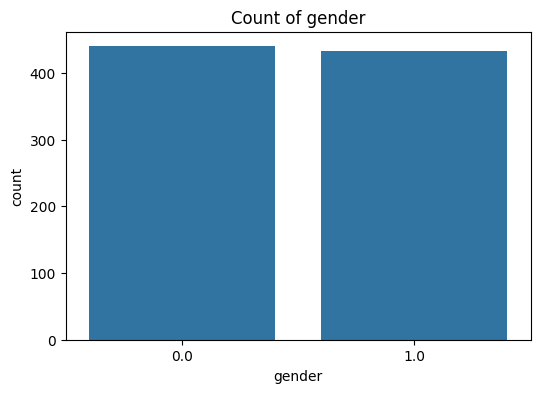

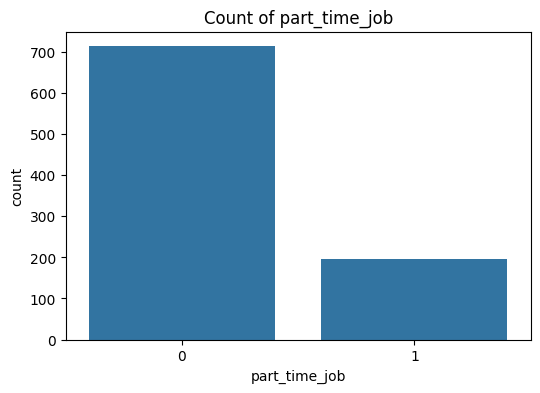

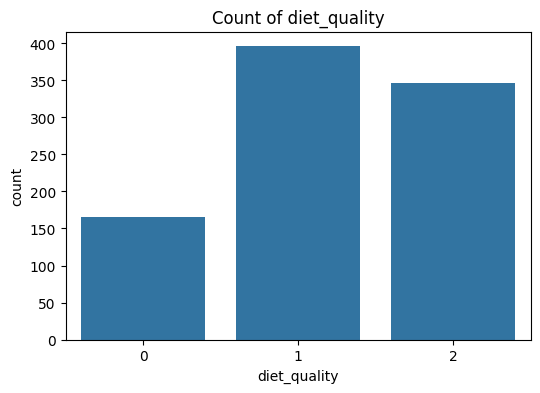

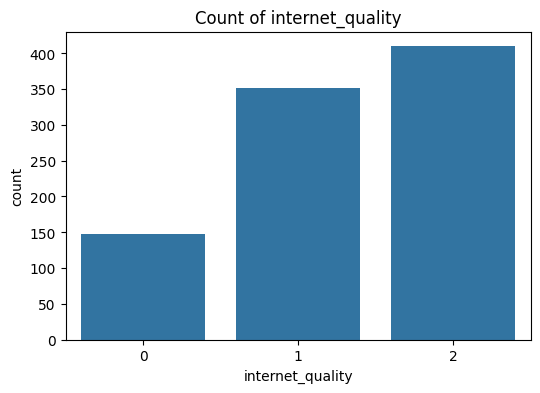

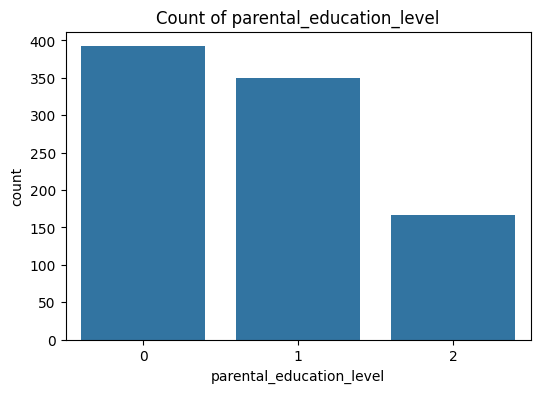

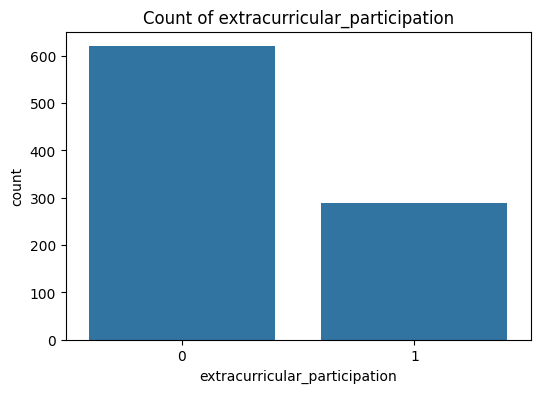

In [10]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'internet_quality', 'parental_education_level', 'extracurricular_participation']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

## Bivariate Analysis: Relationship with Exam Score

### Continuous Variables:

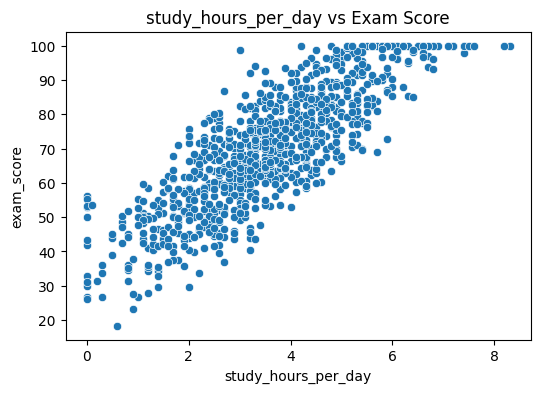

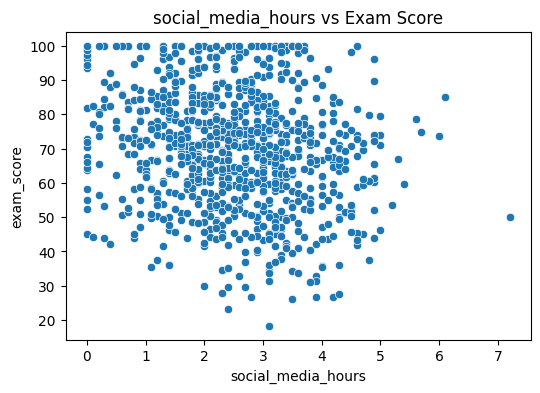

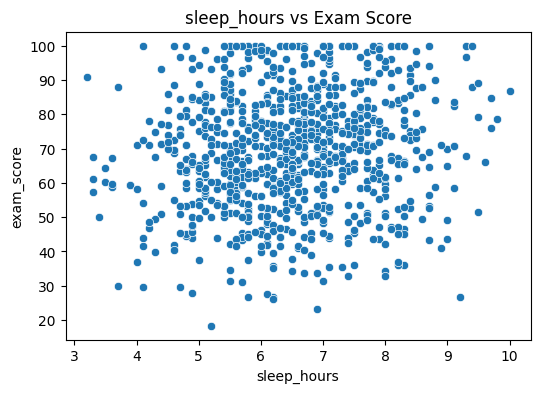

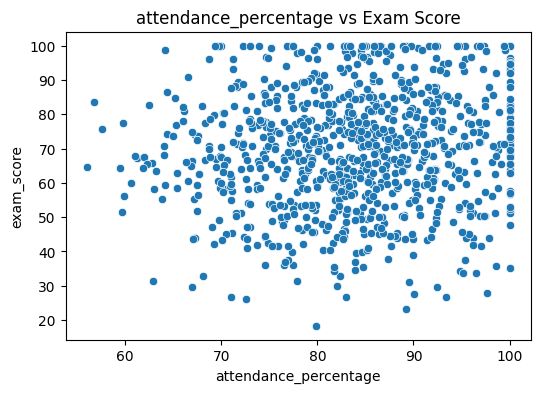

In [11]:
for col in ['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'attendance_percentage']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['exam_score'])
    plt.title(f'{col} vs Exam Score')
    plt.show()

### Categorical Variables:

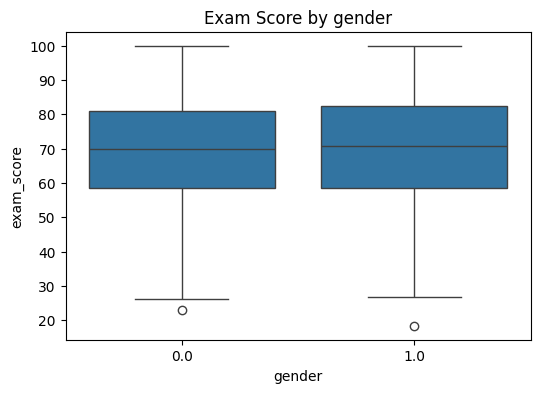

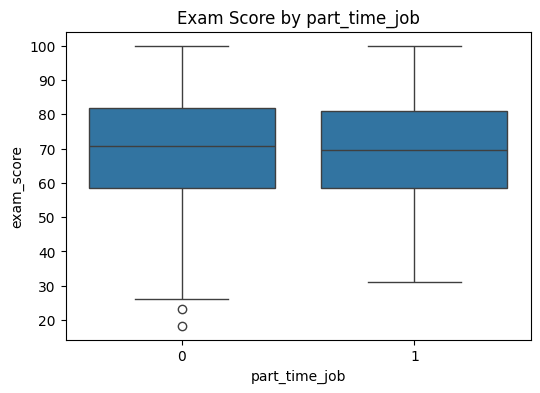

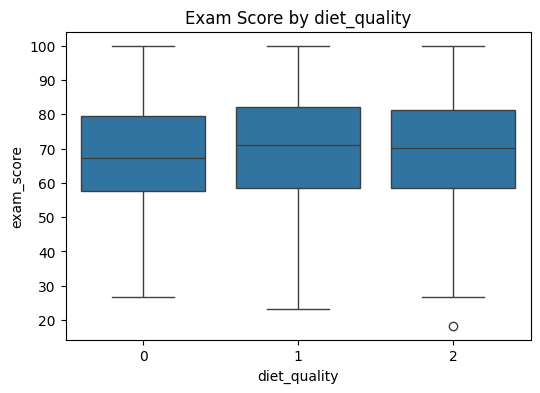

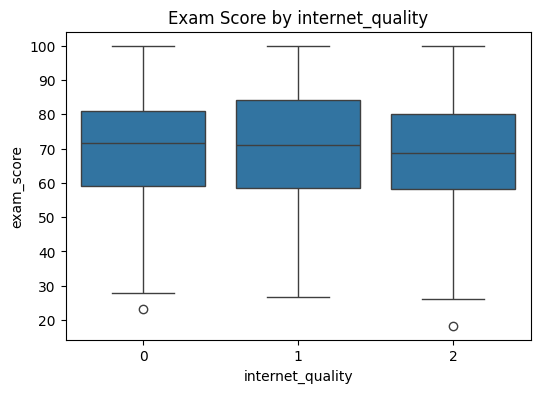

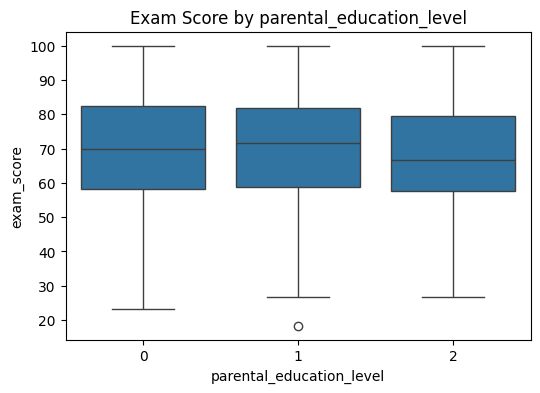

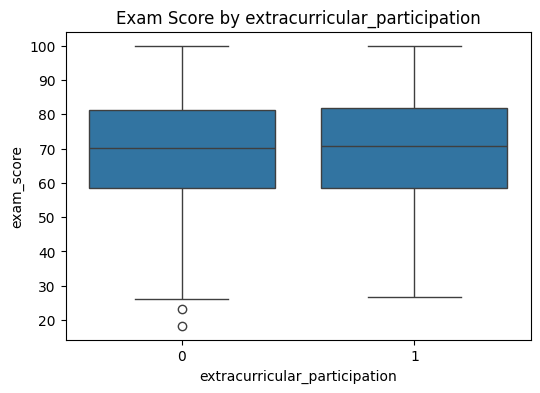

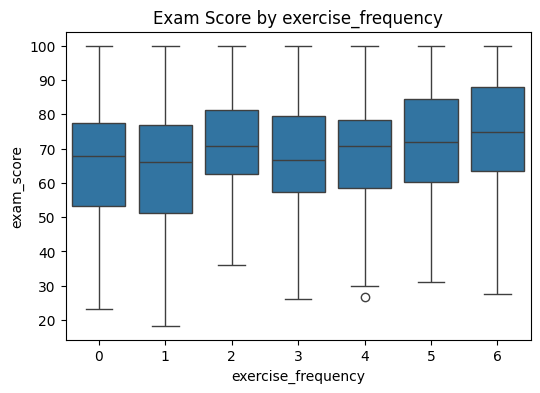

In [12]:
for col in ['gender', 'part_time_job', 'diet_quality', 'internet_quality', 'parental_education_level', 'extracurricular_participation', 'exercise_frequency']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y='exam_score', data=df)
    plt.title(f'Exam Score by {col}')
    plt.show()

## Correlation Matrix

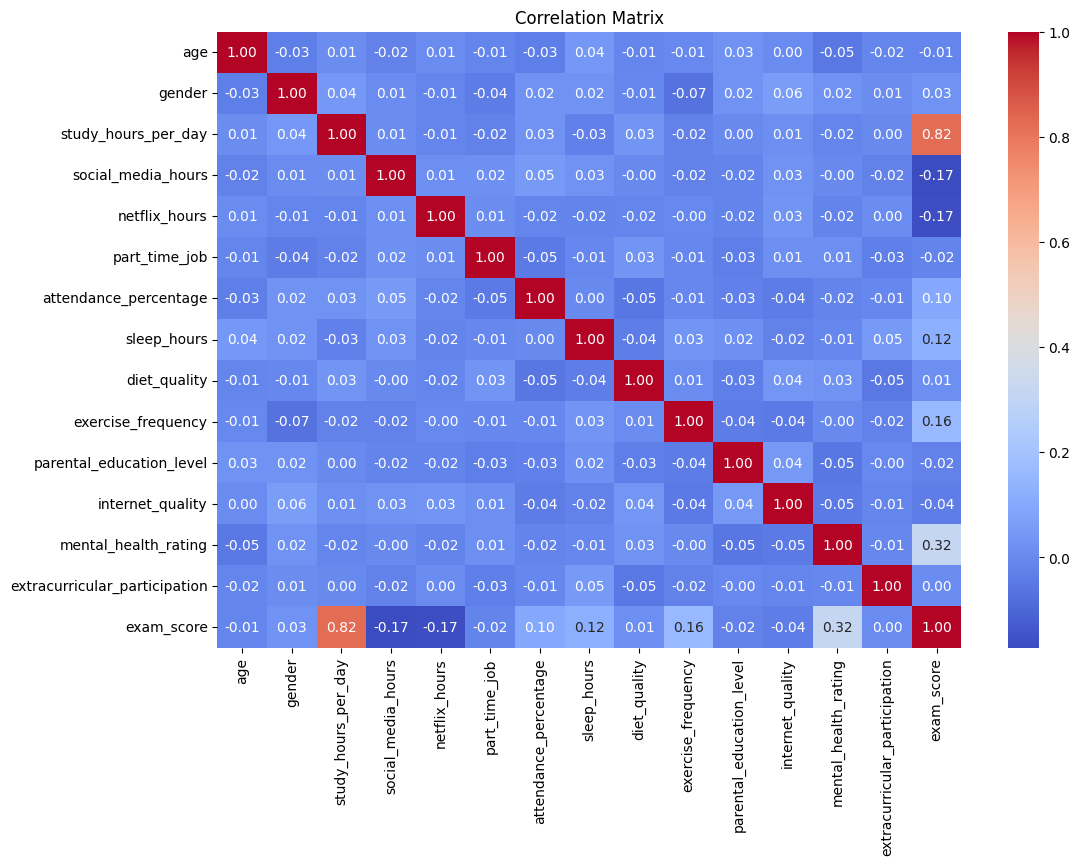

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Statistical Analysis

## Hypothesis Testing

### Diagnostics Checks for Normality and Variance Homogeneity

Shapiro test (No Part-Time Job): ShapiroResult(statistic=np.float64(0.9864528082511825), pvalue=np.float64(3.6147717830521526e-06))
Shapiro test (Part-Time Job): ShapiroResult(statistic=np.float64(0.9833296415898648), pvalue=np.float64(0.020003040418705063))


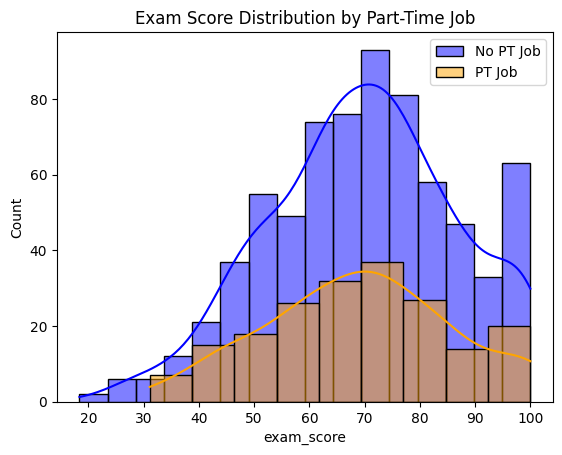

In [14]:
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Part-Time Job
group0 = df[df['part_time_job'] == 0]['exam_score']
group1 = df[df['part_time_job'] == 1]['exam_score']

print("Shapiro test (No Part-Time Job):", shapiro(group0))
print("Shapiro test (Part-Time Job):", shapiro(group1))

sns.histplot(group0, kde=True, color='blue', label='No PT Job')
sns.histplot(group1, kde=True, color='orange', label='PT Job')
plt.legend()
plt.title("Exam Score Distribution by Part-Time Job")
plt.show()

In [15]:
from scipy.stats import levene

levene(group0, group1)

LeveneResult(statistic=np.float64(0.09386892082572801), pvalue=np.float64(0.7593853809677924))

Shapiro test (No extracurricular_participation): ShapiroResult(statistic=np.float64(0.9870667708988096), pvalue=np.float64(2.674979777517132e-05))
Shapiro test (Yes extracurricular_participation): ShapiroResult(statistic=np.float64(0.9847042742637748), pvalue=np.float64(0.0035674593503913716))


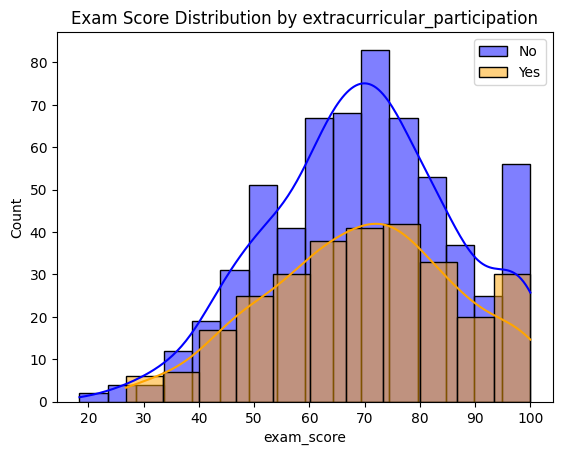

LeveneResult(statistic=np.float64(0.3320416478232236), pvalue=np.float64(0.564602314681857))

In [16]:
# Example for extracurricular_participation
group0 = df[df['extracurricular_participation'] == 0]['exam_score']
group1 = df[df['extracurricular_participation'] == 1]['exam_score']

print("Shapiro test (No extracurricular_participation):", shapiro(group0))
print("Shapiro test (Yes extracurricular_participation):", shapiro(group1))

sns.histplot(group0, kde=True, color='blue', label='No')
sns.histplot(group1, kde=True, color='orange', label='Yes')
plt.legend()
plt.title("Exam Score Distribution by extracurricular_participation")
plt.show()

levene(group0, group1)

Shapiro test (Male): ShapiroResult(statistic=np.float64(0.9859584977298824), pvalue=np.float64(0.0002955295481557729))
Shapiro test (Female): ShapiroResult(statistic=np.float64(0.985394985643979), pvalue=np.float64(0.00023903699951208056))


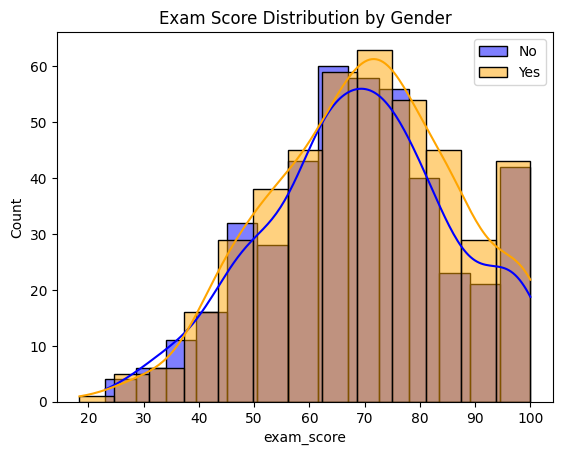

LeveneResult(statistic=np.float64(0.01026848483440161), pvalue=np.float64(0.9193090196510759))

In [17]:
# Example for extracurricular_participation
male = df[df['gender'] == 0]['exam_score']
female = df[df['gender'] == 1]['exam_score']

print("Shapiro test (Male):", shapiro(male))
print("Shapiro test (Female):", shapiro(female))

sns.histplot(male, kde=True, color='blue', label='No')
sns.histplot(female, kde=True, color='orange', label='Yes')
plt.legend()
plt.title("Exam Score Distribution by Gender")
plt.show()

levene(male, female)

In [18]:
for level in df['diet_quality'].unique():
    stat, p = shapiro(df[df['diet_quality'] == level]['exam_score'])
    print(f"Diet Quality {level} - statistic: {stat} - p-value: {p}")

levene(*[df[df['diet_quality'] == x]['exam_score'] for x in df['diet_quality'].unique()])

Diet Quality 1 - statistic: 0.9843953451275279 - p-value: 0.00028507014337388195
Diet Quality 2 - statistic: 0.985954812616826 - p-value: 0.0018869452481212433
Diet Quality 0 - statistic: 0.9843674756659091 - p-value: 0.0591480576015798


LeveneResult(statistic=np.float64(0.028202069906323724), pvalue=np.float64(0.9721927496561776))

In [19]:
for level in df['exercise_frequency'].unique():
    stat, p = shapiro(df[df['exercise_frequency'] == level]['exam_score'])
    print(f"Exercise Freq. {level} - statistic: {stat} - p-value: {p}")

levene(*[df[df['exercise_frequency'] == x]['exam_score'] for x in df['exercise_frequency'].unique()])

Exercise Freq. 6 - statistic: 0.9704209728218911 - p-value: 0.0037555058073208436
Exercise Freq. 1 - statistic: 0.9872488812193174 - p-value: 0.26023276709512566
Exercise Freq. 4 - statistic: 0.9836322860295592 - p-value: 0.1505848047918537
Exercise Freq. 3 - statistic: 0.9854564085339685 - p-value: 0.16279181872815435
Exercise Freq. 2 - statistic: 0.988836831688578 - p-value: 0.4947838400724241
Exercise Freq. 0 - statistic: 0.986344144496363 - p-value: 0.21272846409313015
Exercise Freq. 5 - statistic: 0.9702390758206143 - p-value: 0.00429850155381666


LeveneResult(statistic=np.float64(1.662302261777879), pvalue=np.float64(0.1271573805793244))

In [20]:
for level in df['internet_quality'].unique():
    stat, p = shapiro(df[df['internet_quality'] == level]['exam_score'])
    print(f"Internet Quality {level} - statistic: {stat} - p-value: {p}")

levene(*[df[df['internet_quality'] == x]['exam_score'] for x in df['internet_quality'].unique()])

Internet Quality 1 - statistic: 0.9780621156365805 - p-value: 3.39754496320944e-05
Internet Quality 0 - statistic: 0.9850758670913723 - p-value: 0.11302093480288311
Internet Quality 2 - statistic: 0.9903268143908125 - p-value: 0.008518350019618285


LeveneResult(statistic=np.float64(2.2182292406938298), pvalue=np.float64(0.10939218300570915))

In [21]:
for level in df['mental_health_rating'].unique():
    stat, p = shapiro(df[df['mental_health_rating'] == level]['exam_score'])
    print(f"Mental Health {level} - statistic: {stat} - p-value: {p}")

levene(*[df[df['mental_health_rating'] == x]['exam_score'] for x in df['mental_health_rating'].unique()])

Mental Health 8 - statistic: 0.9618710164129292 - p-value: 0.006888583997421524
Mental Health 1 - statistic: 0.9905051391008676 - p-value: 0.7551398168820005
Mental Health 4 - statistic: 0.9892455401784102 - p-value: 0.6110751272178552
Mental Health 10 - statistic: 0.9620938600241075 - p-value: 0.008985347956431978
Mental Health 9 - statistic: 0.9652376064456267 - p-value: 0.02835776074855727
Mental Health 7 - statistic: 0.9715301957764588 - p-value: 0.054264784291043006
Mental Health 5 - statistic: 0.9839771119512939 - p-value: 0.3357857475224748
Mental Health 2 - statistic: 0.9855963978302232 - p-value: 0.43309079088746
Mental Health 3 - statistic: 0.9850084156795041 - p-value: 0.3987048365401424
Mental Health 6 - statistic: 0.9818930043924223 - p-value: 0.20760788497480934


LeveneResult(statistic=np.float64(1.4777280035704319), pvalue=np.float64(0.15147053265006988))

In [22]:
for level in df['parental_education_level'].unique():
    stat, p = shapiro(df[df['parental_education_level'] == level]['exam_score'])
    print(f"Parental Education Level {level} - statistic: {stat} - p-value: {p}")

levene(*[df[df['parental_education_level'] == x]['exam_score'] for x in df['parental_education_level'].unique()])

Parental Education Level 2 - statistic: 0.98460359745977 - p-value: 0.061834069541507775
Parental Education Level 0 - statistic: 0.9867175089478021 - p-value: 0.0011860848748832427
Parental Education Level 1 - statistic: 0.9809524005253936 - p-value: 0.00013834268092733726


LeveneResult(statistic=np.float64(0.277409221421025), pvalue=np.float64(0.7578086879054843))

# T-Test: Compare Two Groups (Binary Categorical Variables)

In [23]:
from scipy.stats import ttest_ind, mannwhitneyu

group0 = df[df['part_time_job'] == 0]['exam_score']
group1 = df[df['part_time_job'] == 1]['exam_score']

# T-test (Welch’s, since normality is violated)
t_stat, t_p = ttest_ind(group0, group1, equal_var=False)

# Mann-Whitney U-test
u_stat, u_p = mannwhitneyu(group0, group1, alternative='two-sided')

print(f"T-statistic: {t_stat:.3f}, P-value: {t_p:.3f}")
print(f"U-statistic: {u_stat:.3f}, P-value: {u_p:.3f}")

T-statistic: 0.515, P-value: 0.607
U-statistic: 71900.500, P-value: 0.534


In [24]:
group0 = df[df['extracurricular_participation'] == 0]['exam_score']
group1 = df[df['extracurricular_participation'] == 1]['exam_score']

# T-test (Welch’s, since normality is violated)
t_stat, t_p = ttest_ind(group0, group1, equal_var=False)

# Mann-Whitney U-test
u_stat, u_p = mannwhitneyu(group0, group1, alternative='two-sided')

print(f"T-statistic: {t_stat:.3f}, P-value: {t_p:.3f}")
print(f"U-statistic: {u_stat:.3f}, P-value: {u_p:.3f}")

T-statistic: -0.103, P-value: 0.918
U-statistic: 88898.500, P-value: 0.851


In [25]:
group0 = df[df['gender'] == 0]['exam_score']
group1 = df[df['gender'] == 1]['exam_score']

# T-test (Welch’s, since normality is violated)
t_stat, t_p = ttest_ind(group0, group1, equal_var=False)

# Mann-Whitney U-test
u_stat, u_p = mannwhitneyu(group0, group1, alternative='two-sided')

print(f"T-statistic: {t_stat:.3f}, P-value: {t_p:.3f}")
print(f"U-statistic: {u_stat:.3f}, P-value: {u_p:.3f}")

T-statistic: -0.874, P-value: 0.382
U-statistic: 91796.000, P-value: 0.352


# ANOVA: Compare More Than Two Groups (Categorical Variables)

### Diet

In [26]:
from scipy.stats import f_oneway, kruskal

# Group exam scores by diet quality levels
grouped_scores = [df[df['diet_quality'] == level]['exam_score'] for level in sorted(df['diet_quality'].unique())]

# ANOVA
f_stat, f_p = f_oneway(*grouped_scores)

# Kruskal-Wallis
k_stat, k_p = kruskal(*grouped_scores)

print(f"ANOVA: F = {f_stat:.3f}, p = {f_p:.3f}")
print(f"Kruskal-Wallis: H = {k_stat:.3f}, p = {k_p:.3f}")

ANOVA: F = 0.792, p = 0.453
Kruskal-Wallis: H = 1.623, p = 0.444


### Exercise

In [27]:
# Group exam scores by exercise frequency levels
grouped_scores = [df[df['exercise_frequency'] == level]['exam_score'] for level in sorted(df['exercise_frequency'].unique())]

# ANOVA
f_stat, f_p = f_oneway(*grouped_scores)

# Kruskal-Wallis
k_stat, k_p = kruskal(*grouped_scores)

print(f"ANOVA: F = {f_stat:.3f}, p = {f_p:.3f}")
print(f"Kruskal-Wallis: H = {k_stat:.3f}, p = {k_p:.3f}")

ANOVA: F = 5.546, p = 0.000
Kruskal-Wallis: H = 28.839, p = 0.000


In [28]:
import scikit_posthocs as sp
import pandas as pd

# Ensure your data is in the right format
data = df[['exercise_frequency', 'exam_score']].dropna()

# Dunn’s test with Bonferroni correction
dunn_result = sp.posthoc_dunn(data, val_col='exam_score', group_col='exercise_frequency', p_adjust='bonferroni')

dunn_result

,0,1,2,3,4,5,6
0,1.000000,1.000000,0.579840,1.000000,1.000000,0.132842,0.004402
1,1.000000,1.000000,0.113733,1.000000,1.000000,0.017519,0.000324
2,0.579840,0.113733,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.816698,0.049174
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.295343
5,0.132842,0.017519,1.000000,0.816698,1.000000,1.000000,1.000000
6,0.004402,0.000324,1.000000,0.049174,0.295343,1.000000,1.000000


### Parental Education

In [29]:
# Group exam scores by exercise frequency levels
grouped_scores = [df[df['parental_education_level'] == level]['exam_score'] for level in sorted(df['parental_education_level'].unique())]

# ANOVA
f_stat, f_p = f_oneway(*grouped_scores)

# Kruskal-Wallis
k_stat, k_p = kruskal(*grouped_scores)

print(f"ANOVA: F = {f_stat:.3f}, p = {f_p:.3f}")
print(f"Kruskal-Wallis: H = {k_stat:.3f}, p = {k_p:.3f}")

ANOVA: F = 0.942, p = 0.390
Kruskal-Wallis: H = 2.991, p = 0.224


### Internet Quality

In [30]:
# Group exam scores by exercise frequency levels
grouped_scores = [df[df['internet_quality'] == level]['exam_score'] for level in sorted(df['internet_quality'].unique())]

# ANOVA
f_stat, f_p = f_oneway(*grouped_scores)

# Kruskal-Wallis
k_stat, k_p = kruskal(*grouped_scores)

print(f"ANOVA: F = {f_stat:.3f}, p = {f_p:.3f}")
print(f"Kruskal-Wallis: H = {k_stat:.3f}, p = {k_p:.3f}")

ANOVA: F = 1.518, p = 0.220
Kruskal-Wallis: H = 3.060, p = 0.217


### Mental Health

In [31]:
# Group exam scores by exercise frequency levels
grouped_scores = [df[df['mental_health_rating'] == level]['exam_score'] for level in sorted(df['mental_health_rating'].unique())]

# ANOVA
f_stat, f_p = f_oneway(*grouped_scores)

# Kruskal-Wallis
k_stat, k_p = kruskal(*grouped_scores)

print(f"ANOVA: F = {f_stat:.3f}, p = {f_p:.3f}")
print(f"Kruskal-Wallis: H = {k_stat:.3f}, p = {k_p:.3f}")

ANOVA: F = 11.944, p = 0.000
Kruskal-Wallis: H = 96.179, p = 0.000


In [32]:
# Ensure your data is in the right format
data = df[['mental_health_rating', 'exam_score']].dropna()

# Dunn’s test with Bonferroni correction
dunn_result = sp.posthoc_dunn(data, val_col='exam_score', group_col='mental_health_rating', p_adjust='bonferroni')

dunn_result

,1,2,3,4,5,6,7,8,9,10
1,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.109516,0.000594,0.000095,0.000004,3.282740e-07
2,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.050885,0.000225,0.000033,0.000001,9.836133e-08
3,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.839991,0.010269,0.002326,0.000123,1.619800e-05
4,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.027165,0.006576,0.000364,5.072904e-05
5,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.125977,0.038621,0.002745,5.228219e-04
6,1.095157e-01,5.088478e-02,0.839991,1.000000,1.000000,1.000000,1.000000,1.000000,0.579929,2.203670e-01
7,5.943531e-04,2.248252e-04,0.010269,0.027165,0.125977,1.000000,1.000000,1.000000,1.000000,1.000000e+00
8,9.533781e-05,3.312973e-05,0.002326,0.006576,0.038621,1.000000,1.000000,1.000000,1.000000,1.000000e+00
9,3.832131e-06,1.262199e-06,0.000123,0.000364,0.002745,0.579929,1.000000,1.000000,1.000000,1.000000e+00
10,3.282740e-07,9.836133e-08,0.000016,0.000051,0.000523,0.220367,1.000000,1.000000,1.000000,1.000000e+00


In [33]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

# Correlation Analysis

In [34]:
from scipy.stats import pearsonr

r, p_val = pearsonr(df['age'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: -0.013, P-value: 0.699


In [35]:
r, p_val = pearsonr(df['study_hours_per_day'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: 0.823, P-value: 0.000


In [36]:
r, p_val = pearsonr(df['social_media_hours'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: -0.172, P-value: 0.000


In [37]:
r, p_val = pearsonr(df['netflix_hours'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: -0.167, P-value: 0.000


In [38]:
r, p_val = pearsonr(df['attendance_percentage'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: 0.096, P-value: 0.004


In [39]:
r, p_val = pearsonr(df['sleep_hours'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: 0.122, P-value: 0.000


In [40]:
r, p_val = pearsonr(df['mental_health_rating'], df['exam_score'])
print(f"Correlation coefficient: {r:.3f}, P-value: {p_val:.3f}")

Correlation coefficient: 0.318, P-value: 0.000


In [42]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

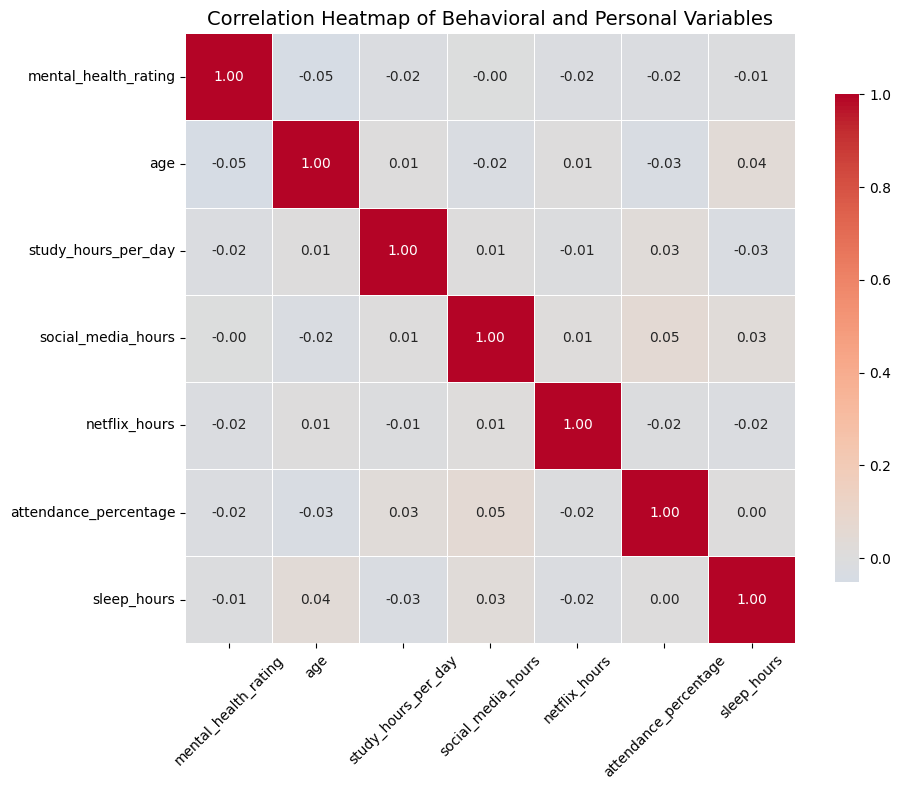

In [43]:
# Select the relevant columns from your DataFrame
corr_vars = ['mental_health_rating', 'age', 'study_hours_per_day', 'social_media_hours',
             'netflix_hours', 'attendance_percentage', 'sleep_hours']

# Drop missing values to avoid correlation issues
data = df[corr_vars].dropna()

# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Title and layout
plt.title('Correlation Heatmap of Behavioral and Personal Variables', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()